In [1]:
import os
os.chdir('..')

import functools
from dataset.conclusion_generation import test_for_mental_models, generate_random_tree, generate_and_save_trees
from dataset.logic_tree import OperatorNode
from dataset.encoding import encode_mental_models_separated_sentences, load_sentences_and_conclusions
import numpy as np
import tensorflow as tf
import tensorflow.keras as kr
import matplotlib.pyplot as plt
from dataset.common import get_separated_sequences_mental_models_dataset
import dataset.encoding
import dataset

In [6]:
DATA_PATH = os.getcwd() + '\\temp'

In [8]:
# max_depth = 2
# num_variables = 5
# input_length = 10
# output_length = 5

# class SeparatorNode(OperatorNode):
#     accepts_children = 2

#     def __init__(self, *children):
#         super(SeparatorNode, self).__init__('sep', *children)

#     def evaluate(self, values):
#         value = self._children[0].evaluate(values)
#         for child in self._children[1:]:
#             value = value and child.evaluate(values)

#         return value

#     def to_string(self):
#         string = f'{self._children[0].to_string()}'
#         for child in self._children[1:]:
#             string += f' {self._operator_symbol} {child.to_string()}'
#         return string


# test_for_one_mental_models = functools.partial(test_for_mental_models, allow_only_one_mental_model=False)
# # test_for_mental_models_type_two = functools.partial(test_for_mental_models, type_one=False)
# # test_for_one_mental_models_type_two = functools.partial(test_for_mental_models, type_one=False,
# #                                                         allow_only_one_mental_model=True)
# generate_random_sep_tree = functools.partial(generate_random_tree, root_node_cls=SeparatorNode)

# generate_and_save_trees('./data', 50000, 2, 5,
#                         test_for_one_mental_models, generate_random_sep_tree,
#                         base_name='and_trees_single_mms_type_I')

# encode_mental_models_separated_sentences('./data', 2, 5, 10,
#                                          'encoded_and_trees_single_mms_type_I',
#                                          'and_trees_single_mms_type_I')
# data = load_sentences_and_conclusions('./data', num_variables=5, max_depth=2,
#                                       base_name='encoded_and_trees_single_mms_type_I')
# sentences, mental_models, input_dictionary, output_dictionary = data

# for i in range(10):
#     print(sentences[i])
#     print(mental_models[i])
#     print()

Checked 100 (0.2%) trees, correct: 92, recently correct: 92.0%, eta: 07s
Checked 200 (0.4%) trees, correct: 179, recently correct: 87.0%, eta: 06s
Checked 300 (0.6%) trees, correct: 253, recently correct: 74.0%, eta: 06s
Checked 400 (0.8%) trees, correct: 330, recently correct: 77.0%, eta: 06s
Checked 500 (1.0%) trees, correct: 403, recently correct: 73.0%, eta: 05s
Checked 600 (1.2%) trees, correct: 466, recently correct: 63.0%, eta: 05s
Checked 700 (1.4%) trees, correct: 531, recently correct: 65.0%, eta: 05s
Checked 800 (1.6%) trees, correct: 598, recently correct: 67.0%, eta: 05s
Checked 900 (1.8%) trees, correct: 664, recently correct: 66.0%, eta: 05s
Checked 1000 (2.0%) trees, correct: 723, recently correct: 59.0%, eta: 05s
Checked 1100 (2.2%) trees, correct: 784, recently correct: 61.0%, eta: 05s
Checked 1200 (2.4%) trees, correct: 836, recently correct: 52.0%, eta: 05s
Checked 1300 (2.6%) trees, correct: 884, recently correct: 48.0%, eta: 05s
Checked 1400 (2.8%) trees, correct:

Checked 13500 (27.0%) trees, correct: 3092, recently correct: 2.0%, eta: 04s
Checked 13600 (27.2%) trees, correct: 3103, recently correct: 11.0%, eta: 04s
Checked 13700 (27.4%) trees, correct: 3110, recently correct: 7.0%, eta: 04s
Checked 13800 (27.6%) trees, correct: 3118, recently correct: 8.0%, eta: 04s
Checked 13900 (27.8%) trees, correct: 3121, recently correct: 3.0%, eta: 04s
Checked 14000 (28.0%) trees, correct: 3125, recently correct: 4.0%, eta: 04s
Checked 14100 (28.2%) trees, correct: 3131, recently correct: 6.0%, eta: 04s
Checked 14200 (28.4%) trees, correct: 3137, recently correct: 6.0%, eta: 04s
Checked 14300 (28.6%) trees, correct: 3140, recently correct: 3.0%, eta: 04s
Checked 14400 (28.8%) trees, correct: 3148, recently correct: 8.0%, eta: 04s
Checked 14500 (29.0%) trees, correct: 3150, recently correct: 2.0%, eta: 04s
Checked 14600 (29.2%) trees, correct: 3155, recently correct: 5.0%, eta: 04s
Checked 14700 (29.4%) trees, correct: 3160, recently correct: 5.0%, eta: 04

Checked 25400 (50.8%) trees, correct: 3423, recently correct: 1.0%, eta: 03s
Checked 25500 (51.0%) trees, correct: 3425, recently correct: 2.0%, eta: 03s
Checked 25600 (51.2%) trees, correct: 3426, recently correct: 1.0%, eta: 03s
Checked 25700 (51.4%) trees, correct: 3428, recently correct: 2.0%, eta: 03s
Checked 25800 (51.6%) trees, correct: 3428, recently correct: 0.0%, eta: 02s
Checked 25900 (51.8%) trees, correct: 3429, recently correct: 1.0%, eta: 02s
Checked 26000 (52.0%) trees, correct: 3433, recently correct: 4.0%, eta: 02s
Checked 26100 (52.2%) trees, correct: 3434, recently correct: 1.0%, eta: 02s
Checked 26200 (52.4%) trees, correct: 3435, recently correct: 1.0%, eta: 02s
Checked 26300 (52.6%) trees, correct: 3435, recently correct: 0.0%, eta: 02s
Checked 26400 (52.8%) trees, correct: 3436, recently correct: 1.0%, eta: 02s
Checked 26500 (53.0%) trees, correct: 3439, recently correct: 3.0%, eta: 02s
Checked 26600 (53.2%) trees, correct: 3440, recently correct: 1.0%, eta: 02s

Checked 36600 (73.2%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 36700 (73.4%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 36800 (73.6%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 36900 (73.8%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 37000 (74.0%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 37100 (74.2%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 37200 (74.4%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 37300 (74.6%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 37400 (74.8%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 37500 (75.0%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 37600 (75.2%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 37700 (75.4%) trees, correct: 3478, recently correct: 2.0%, eta: 01s
Checked 37800 (75.6%) trees, correct: 3478, recently correct: 0.0%, eta: 01s

Checked 47900 (95.8%) trees, correct: 3488, recently correct: 0.0%, eta: 00s
Checked 48000 (96.0%) trees, correct: 3488, recently correct: 0.0%, eta: 00s
Checked 48100 (96.2%) trees, correct: 3488, recently correct: 0.0%, eta: 00s
Checked 48200 (96.4%) trees, correct: 3488, recently correct: 0.0%, eta: 00s
Checked 48300 (96.6%) trees, correct: 3488, recently correct: 0.0%, eta: 00s
Checked 48400 (96.8%) trees, correct: 3488, recently correct: 0.0%, eta: 00s
Checked 48500 (97.0%) trees, correct: 3488, recently correct: 0.0%, eta: 00s
Checked 48600 (97.2%) trees, correct: 3488, recently correct: 0.0%, eta: 00s
Checked 48700 (97.4%) trees, correct: 3488, recently correct: 0.0%, eta: 00s
Checked 48800 (97.6%) trees, correct: 3488, recently correct: 0.0%, eta: 00s
Checked 48900 (97.8%) trees, correct: 3488, recently correct: 0.0%, eta: 00s
Checked 49000 (98.0%) trees, correct: 3488, recently correct: 0.0%, eta: 00s
Checked 49100 (98.2%) trees, correct: 3488, recently correct: 0.0%, eta: 00s

[[[ 7  5  9  1  6]
  [ 8  1  0  0  0]]

 [[ 7  4  9  3  6]
  [ 7  5 10  4  6]]

 [[ 7  2  9  3  6]
  [ 5  0  0  0  0]]

 [[ 2  0  0  0  0]
  [ 7  2 10  1  6]]

 [[ 8  1  0  0  0]
  [ 7  3  9  1  6]]]
[[[-1  0  0  0  1]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 0  0  0  1  1]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 0  0  1  0  1]
  [ 0  1  0  0  1]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 1  1  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[-1  0  1  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]]
max_input_length 1
input (None, 11, 1)
input2 (None, 1)
embedding_layer (None, 11, 1, 10)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 11, 1)]      0                                            
______

354/354 [==============================] - 2s 5ms/step - loss: 1.6378e-04 - val_loss: 5.0297e-04
Epoch 53/1000
354/354 [==============================] - 2s 5ms/step - loss: 2.2855e-04 - val_loss: 0.0012
Epoch 54/1000
354/354 [==============================] - 2s 5ms/step - loss: 2.5038e-04 - val_loss: 5.3124e-04
Epoch 55/1000
354/354 [==============================] - 2s 5ms/step - loss: 1.6768e-04 - val_loss: 5.1020e-04
Epoch 56/1000
354/354 [==============================] - 2s 5ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 57/1000
354/354 [==============================] - 2s 5ms/step - loss: 3.9583e-04 - val_loss: 4.6583e-04
Epoch 58/1000
354/354 [==============================] - 2s 4ms/step - loss: 1.1473e-04 - val_loss: 4.0670e-04
Epoch 59/1000
354/354 [==============================] - 2s 4ms/step - loss: 7.9194e-05 - val_loss: 3.7042e-04
Epoch 60/1000
354/354 [==============================] - 2s 4ms/step - loss: 7.9441e-05 - val_loss: 3.7765e-04
Epoch 61/1000
354/354 [====

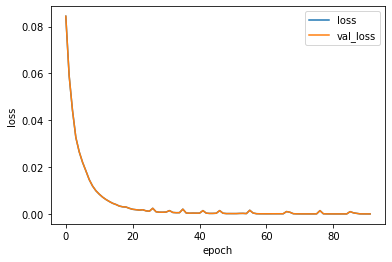

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [3]:
def broadcast(x, y):
    tf.print(x.shape, y.shape)
    x = x[..., np.newaxis]
    y = y[..., np.newaxis]
    x = np.transpose(x, axes=[0, 2, 1])
    y = np.transpose(y, axes=[2, 0, 1])
    x, y = np.broadcast_arrays(x, y)
    return x, y


def calculate_values(x, y):
    s = x + y
    sc = np.clip(s, -1, 1)
    return sc


def calculate_correctness(x, y):
    diff = 1 - np.maximum(0, np.abs(x - y) - 1)
    prod = np.prod(diff, axis=-1)
    return prod


def calculate_values_soft(x, y, av=10):
    return np.tanh((x + y) * av)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def calculate_correctness_soft(x, y, ac=10):
    diff = 1 - sigmoid((np.abs(x - y) - 1.5) * ac)
    prod = np.prod(diff, axis=-1)
    return prod


def calculate_out(values, correctness):
    result = values * correctness[..., np.newaxis]
    reshaped = np.reshape(result, (result.shape[0] * result.shape[1], result.shape[2]))
    return reshaped


def combine_mental_models(mm1, mm2):
    mm1b, mm2b = broadcast(mm1, mm2)
    values = calculate_values(mm1b, mm2b)
    correctness = calculate_correctness(mm1b, mm2b)
    out = calculate_out(values, correctness)
    return out


def combine_mental_models_soft(mm1, mm2):
    mm1b, mm2b = broadcast(mm1, mm2)
    values = calculate_values_soft(mm1b, mm2b, av=10)
    correctness = calculate_correctness_soft(mm1b, mm2b, ac=10)
    out = calculate_out(values, correctness)
    return out


def test_mm_inference():
    # (a or b)      ---> [T, n], [n, T]
    # (a or not b)  ---> [T, n], [n, F]
    mm1 = np.array([
        [1, 0],
        [0, 1],
    ])
    mm2 = np.array([
        [1, 0],
        [0, -1]
    ])

    combined_mental_models = combine_mental_models(mm1, mm2)
    combined_mental_models_soft = combine_mental_models_soft(mm1, mm2)
    print(combined_mental_models)
    print(combined_mental_models_soft)


class MMInferenceLayer(kr.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def broadcast(self, x, y):
        x = tf.expand_dims(x, axis=-1)
        y = tf.expand_dims(y, axis=-1)
        x = tf.transpose(x, perm=[0, 1, 3, 2])
        y = tf.transpose(y, perm=[0, 3, 1, 2])
        # x = tf.broadcast_to(x, (x.shape[0], x.shape[1]))
        # x, y =  np.broadcast_arrays(x, y)
        return x, y

    def call(self, inputs, **kwargs):
        x = inputs[0]
        y = inputs[1]

        x, y = self.broadcast(x, y)

        s = x + y
        value = tf.clip_by_value(s, -1, 1)
        # applicability = (tf.reduce_max(tf.abs(x), axis=-1) * tf.reduce_max(tf.abs(y), axis=-1))
        # value = value * tf.expand_dims(applicability, axis=-1)

        diff = 1 - tf.maximum(0., tf.abs(x - y) - 1.)
        correctness = tf.reduce_prod(diff, axis=-1)
        mms = value * tf.expand_dims(correctness, axis=-1)
        reshaped_value = tf.reshape(mms, (-1, mms.shape[-3] * mms.shape[-2], mms.shape[-1]))
        reshaped_correctness = tf.reshape(correctness, (-1, correctness.shape[-2] * correctness.shape[-1]))
        mm = tf.reduce_sum(reshaped_value, axis=-2)
        mm = mm / tf.reduce_sum(reshaped_correctness, axis=-1, keepdims=True)
        # mm = tf.clip_by_value(mm, -1, 1)
        # mm = tf.tanh(mm)
        return mm


def create_inference_model(num_variables, max_input_length, max_sub_mental_models):
    embedding_size = 10
    hidden_units = 128
    print('max_input_length', max_input_length)
    input = kr.Input(shape=(2, max_input_length))
    split_layer = kr.layers.Lambda(lambda x: (x[:, 0], x[:, 1]))(input)

    nn_input = kr.Input(max_input_length)
    nn_embedding_layer = kr.layers.Embedding(num_symbols + 1, embedding_size)(nn_input);print(nn_embedding_layer)
    flatten_layer = kr.layers.Flatten()(nn_embedding_layer);print(flatten_layer.shape)
    nn_hidden = kr.layers.Dense(hidden_units, activation='relu')(flatten_layer)
    nn_output = kr.layers.Dense(num_variables * max_sub_mental_models,
                                activation='tanh',
                                activity_regularizer=kr.regularizers.L1(0.0))(nn_hidden)
    nn_reshape = kr.layers.Reshape((max_sub_mental_models, num_variables))(nn_output)
    sub_sequence_nn = kr.Model(inputs=nn_input, outputs=nn_reshape, name='sub-sequence-NN')
    sub_sequence_nn.summary()

    mm = sub_sequence_nn(split_layer[0]), sub_sequence_nn(split_layer[1])
    mm_inference_layer = MMInferenceLayer()(mm)

    model = kr.Model(inputs=input, outputs=mm_inference_layer)
    model.summary()

    return model

def create_varying_inference_model1(num_variables, max_input_length):
    # Without specific token for start of sequence (index 0) and end of sequence (index 1) - (0,0,0,0,0) equals end
    # Initialise parameters
    batch_size = 8
    embedding_size = 10
    hidden_units = 128
    print('max_input_length', max_input_length)
    
    # Create input for encoder
    encoder_inputs = kr.Input(shape=(2, max_input_length))

    print('input',encoder_inputs.shape)
    
    # Make model - Encoder (flatten / concatenate subsentences to one vector (subsentence representation))
    nn_input = kr.Input(shape=(num_variables))
    nn_embedding_layer = kr.layers.Embedding(num_symbols+1, embedding_size)(encoder_inputs)
    nn_flatten = tf.keras.layers.Reshape((nn_embedding_layer.shape[1],-1))(nn_embedding_layer)
    encoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
    encoder_outputs, state_h, state_c = encoder(nn_flatten)
    encoder_states = [state_h, state_c]
    
    # Create decoder
    decoder_inputs = kr.Input(shape=(None,num_variables))
    decoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
    decoder_outputs, _, _ = decoder(decoder_inputs,
                                         initial_state=encoder_states)
    decoder_dense = kr.layers.Dense(num_variables, activation='tanh')
    output = decoder_dense(decoder_outputs)

    ## Define training model
    model_train = kr.Model(inputs=[encoder_inputs, decoder_inputs], outputs=output)
    model_train.summary()
    
    ## Train model 
    model_train.compile(optimizer=kr.optimizers.Adam(learning_rate=1e-3),
                  loss=kr.losses.mse)

    callbacks = [kr.callbacks.EarlyStopping(patience=20, min_delta=1e-5, restore_best_weights=True)]
    history = model_train.fit([ds.x_train, ds.y_train_d], ds.y_train, validation_data=([ds.x_valid, ds.y_valid_d], ds.y_valid),
                        epochs=1000, batch_size=batch_size, callbacks=callbacks)
    
    ## Define testing models (no teacher forcing)
    encoder_model = kr.Model(encoder_inputs, encoder_states)

    decoder_state_input_h = kr.Input(shape=(hidden_units,))
    decoder_state_input_c = kr.Input(shape=(hidden_units,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder(
        decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = kr.Model(
        [decoder_inputs] + decoder_states_inputs,
        [decoder_outputs] + decoder_states)

    # Returned trained models, and history of training
    return model_train, history, encoder_model, decoder_model

def create_varying_inference_model2(num_variables, max_input_length):
    # With specific token for start of sequence (index 0) and end of sequence (index 1)
    # Initialise parameters
    batch_size = 8
    embedding_size = 10
    hidden_units = 128
    print('max_input_length', max_input_length)
    # Create input for encoder
    encoder_inputs = kr.Input(shape=(2, max_input_length))

    print('input',encoder_inputs.shape)
    
    # Make model - Encoder (flatten / concatenate subsentences to one vector (subsentence representation))
    nn_input = kr.Input(shape=(num_variables))
    nn_embedding_layer = kr.layers.Embedding(num_symbols+1, embedding_size)(encoder_inputs)
    nn_flatten = tf.keras.layers.Reshape((nn_embedding_layer.shape[1],-1))(nn_embedding_layer)
    encoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
    encoder_outputs, state_h, state_c = encoder(nn_flatten)
    encoder_states = [state_h, state_c]
    
    # Create decoder
    decoder_inputs = kr.Input(shape=(None,num_variables+2))
    decoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
    decoder_outputs, _, _ = decoder(decoder_inputs,
                                         initial_state=encoder_states)
    decoder_dense = kr.layers.Dense(num_variables+2, activation='tanh')
    output = decoder_dense(decoder_outputs)

    ## Define training model
    model_train = kr.Model(inputs=[encoder_inputs, decoder_inputs], outputs=output)
    model_train.summary()
    
    ## Train model 
    model_train.compile(optimizer=kr.optimizers.Adam(learning_rate=1e-3),
                  loss=kr.losses.mse)

    callbacks = [kr.callbacks.EarlyStopping(patience=20, min_delta=1e-5, restore_best_weights=True)]
    history = model_train.fit([ds.x_train, ds.y_train_d], ds.y_train, validation_data=([ds.x_valid, ds.y_valid_d], ds.y_valid),
                        epochs=1000, batch_size=batch_size, callbacks=callbacks)
    
    ## Define testing models (no teacher forcing)
    encoder_model = kr.Model(encoder_inputs, encoder_states)

    decoder_state_input_h = kr.Input(shape=(hidden_units,))
    decoder_state_input_c = kr.Input(shape=(hidden_units,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder(
        decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = kr.Model(
        [decoder_inputs] + decoder_states_inputs,
        [decoder_outputs] + decoder_states)

    # Returned trained models, and history of training
    return model_train, history, encoder_model, decoder_model

def create_varying_inference_model3(num_variables, max_input_length):
    # Without specific token for start of sequence (index 0) and end of sequence (index 1) - (0,0,0,0,0) equals end
    # Based on characters instead of subsentences
    # Initialise parameters
    batch_size = 8
    embedding_size = 10
    hidden_units = 128
    print('max_input_length', max_input_length)
    
    # Create input for encoder
    encoder_inputs = kr.Input(shape=(11, max_input_length))

    print('input',encoder_inputs.shape)
    
    # Make model - Encoder (flatten / concatenate subsentences to one vector (subsentence representation))
    nn_input = kr.Input(shape=(1))
    print('input2', nn_input.shape)
    nn_embedding_layer = kr.layers.Embedding(num_symbols+1, embedding_size)(encoder_inputs)
    nn_flatten = tf.keras.layers.Reshape((nn_embedding_layer.shape[1],-1))(nn_embedding_layer)
    print('embedding_layer', nn_embedding_layer.shape)
    encoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
    encoder_outputs, state_h, state_c = encoder(nn_flatten)
    encoder_states = [state_h, state_c]
    
    # Create decoder
    decoder_inputs = kr.Input(shape=(None,num_variables))
    decoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
    decoder_outputs, _, _ = decoder(decoder_inputs,
                                         initial_state=encoder_states)
    decoder_dense = kr.layers.Dense(num_variables, activation='tanh')
    output = decoder_dense(decoder_outputs)

    ## Define training model
    model_train = kr.Model(inputs=[encoder_inputs, decoder_inputs], outputs=output)
    model_train.summary()
    
    ## Train model 
    model_train.compile(optimizer=kr.optimizers.Adam(learning_rate=1e-3),
                  loss=kr.losses.mse)

    callbacks = [kr.callbacks.EarlyStopping(patience=20, min_delta=1e-5, restore_best_weights=True)]
    history = model_train.fit([ds.x_train, ds.y_train_d], ds.y_train, validation_data=([ds.x_valid, ds.y_valid_d], ds.y_valid),
                        epochs=1000, batch_size=batch_size, callbacks=callbacks)
    
    ## Define testing models (no teacher forcing)
    encoder_model = kr.Model(encoder_inputs, encoder_states)

    decoder_state_input_h = kr.Input(shape=(hidden_units,))
    decoder_state_input_c = kr.Input(shape=(hidden_units,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder(
        decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = kr.Model(
        [decoder_inputs] + decoder_states_inputs,
        [decoder_outputs] + decoder_states)

    # Returned trained models, and history of training
    return model_train, history, encoder_model, decoder_model

def decode_sequence1(input_seq, encoder_model, decoder_model):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_variables))
    # Populate the first character of target sequence with the start character.
#     target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_output = target_seq
    while not stop_condition:
        output, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Save MMs
        pred = np.rint(output).astype(int)
        decoded_output = np.concatenate((decoded_output, pred), axis=1)

        # Exit condition: hit max length
        # this padding, such that all arrays have the same size in decoded_output.
        if decoded_output.shape[1] > num_variables:
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = pred

        # Update states
        states_value = [h, c]

    return decoded_output[:,1:,:]

def decode_sequence2(input_seq, encoder_model, decoder_model):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_variables+2))
    # Populate the first character of target sequence with the start character.
#     target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_output = target_seq
    while not stop_condition:
        output, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Save MMs
        pred = np.rint(output).astype(int)
        decoded_output = np.concatenate((decoded_output, pred), axis=1)

        # Exit condition: hit max length
        # this padding, such that all arrays have the same size in decoded_output.
        if decoded_output.shape[1] > num_variables:
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = pred

        # Update states
        states_value = [h, c]

    return decoded_output[:,1:,:]

def decode_sequences1(data, encoder_model, decoder_model):
    preds = decode_sequence1(data[[0]], encoder_model, decoder_model)
    for i in range(1,ds.x_test.shape[0]):
        pred = decode_sequence1(data[[i]], encoder_model, decoder_model)
        preds = np.concatenate((preds, pred), axis=0)
        print(i)
        
    return preds

def decode_sequences2(data, encoder_model, decoder_model):
    preds = decode_sequence2(data[[0]], encoder_model, decoder_model)
    for i in range(1,ds.x_test.shape[0]):
        pred = decode_sequence2(data[[i]], encoder_model, decoder_model)
        preds = np.concatenate((preds, pred), axis=0)
        print(i)
        
    return preds

def two_way_mse(y_true, y_pred):
    y_true_float = tf.cast(y_true, y_pred.dtype)
    diff = (y_true_float - y_pred) ** 2
    print(diff)
    return tf.reduce_mean(diff)


def show_subsentence_inference(model, ds, decoding_dictionary, idxs):
    sub_model = model.layers[2]
    for i in idxs:
        for j in range(2):
            x = ds.x_test[i][j]
            pred = sub_model.predict(x[np.newaxis, ...])
            print(dataset.encoding.decode_sentence(x, decoding_dictionary, ds.indexed_encoding))
            print(np.rint(pred))
            
def add_zero_row1(data, position):
    if position == 'front':
        temp = np.zeros((data.shape[0],data.shape[1]+1,data.shape[2]))
        temp[:,1:,:] = data
    elif position == 'last':
        temp = np.zeros((data.shape[0],data.shape[1]+1,data.shape[2]))
        temp[:,:-1,:] = data

    return temp

def add_zero_row2(dst, position):
    start_vec = np.array([1,0] + [0] * (num_variables))
    end_vec = np.array([0,1] + [0] * (num_variables))
    if position == 'front':
        data = np.zeros((dst.shape[0], dst.shape[1]+1, dst.shape[2]+2))
        data[:,1:,2:] = dst
        for i in range(data.shape[0]):
            data[i][data[i].sum(axis=1) == 0] = end_vec
            data[i][0,:] = start_vec
    elif position == 'last':
        data = np.zeros((dst.shape[0], dst.shape[1]+1, dst.shape[2]+2))
        data[:,:-1,2:] = dst
        for i in range(data.shape[0]):
            data[i][data[i].sum(axis=1) == 0] = end_vec
            data[i][-1,:] = end_vec
        
    return data

def concat_subsentences(data):
    temp = np.array(data[0][0].tolist() + [10] + data[0][1].tolist())[np.newaxis, ...]
    for i in range(1,data.shape[0]):
        sentence = np.array(data[i][0].tolist() + [10] + data[i][1].tolist())[np.newaxis, ...]
        temp = np.concatenate((temp, sentence), axis=0)
    
    return temp[..., np.newaxis]

def same_MMs(true, pred):
    true = true.tolist()
    pred = pred.tolist()
    # Check if all occur
    for i in range(len(pred)):
        if pred[i] in true:
            # If occur, remove from true
            true.remove(pred[i])

    # If nothing in true, everything is predicted correctly
    return true == []


if __name__ == '__main__':
    ds = get_separated_sequences_mental_models_dataset('./data', 'encoded_and_trees_single_mms_type_I',
                                                       num_variables=5, max_depth=2,
                                                       test_size=.1, valid_size=.1,
                                                       indexed_encoding=True, pad_mental_models=True)

    dec_in, dec_out = dataset.encoding.create_decoding_dictionaries(ds.input_dictionary, ds.output_dictionary)

    ds.y_train_d = add_zero_row1(ds.y_train, 'front')
    ds.y_train = add_zero_row1(ds.y_train, 'last')
    ds.y_valid_d = add_zero_row1(ds.y_valid, 'front')
    ds.y_valid = add_zero_row1(ds.y_valid, 'last')
    ds.y_test_d = add_zero_row1(ds.y_test, 'front')
    ds.y_test = add_zero_row1(ds.y_test, 'last')
    
    # Uncomment for model 3
    ds.x_train = concat_subsentences(ds.x_train)
    ds.x_valid = concat_subsentences(ds.x_valid)
    ds.x_test = concat_subsentences(ds.x_test)
    
    num_variables = 5
    num_operators = 5  # and, or, not
    num_symbols = num_variables + num_operators
    max_input_length = ds.x_train.shape[-1]
    
    # 1: subsentences no index, 2: subsentences index, 3: symbols no index
    model_train, history, encoder_model, decoder_model = create_varying_inference_model3(num_variables, 
                                                                                        max_input_length)
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(range(len(loss)), loss, label='loss')
    plt.plot(range(len(val_loss)), loss, label='val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    preds = decode_sequences1(ds.x_test, encoder_model, decoder_model)
    for i in range(preds.shape[0]):
        print(preds[i], ds.y_test[i])

    print('errors:')
    errors = 0
    for i in range(preds.shape[0]):
        if same_MMs(ds.y_test[i], preds[i]):
            continue
        print(dataset.encoding.decode_sentence(ds.x_test[i][0], dec_in, ds.indexed_encoding))
        print(dataset.encoding.decode_sentence(ds.x_test[i][1], dec_in, ds.indexed_encoding))
        print(ds.y_test[i])
        print(preds[i])
        print()
        
        errors += 1

    errors = np.count_nonzero(np.sum(np.abs(preds - ds.y_test), axis=-1))
    print('errors', int(errors))
    print(f'accuracy: {int((1 - int(errors)/ds.x_test.shape[0]) * 1000) / 10}%')